### 先引入會用到的套件

In [69]:
#先引入會用到的相關套件
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import Perceptron
import pydotplus
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


### 讀取資料

In [88]:
# 從檔案裡面把資料出來
# Params：
# fname ：檔案位置

# return ：
# data：處理後的結果
#
def read_dataset(fname):
    # 第一行為欄位名稱 agelevel,income,student,credit,BuyComputer 
    # data = pd.read_csv(fname, index_col=0) 
    data = pd.read_csv(fname)
    # 處理 agelevel 數據, youth : 0, middle : 1, senior : 2
    data['agelevel'] = np.where(data['agelevel'] == 'senior', 2, np.where(data['agelevel'] == 'middle', 1, 0) )
    # 處理 income 數據, low : 0, medium : 1, high : 2
    data['income'] = np.where(data['income'] == 'high', 2, np.where(data['income'] == 'medium', 1, 0) )
    # 處理 student 數據, yes : 0, no : 1
    data['student'] = (data['student'] == 'yes').astype('int')
    # 處理 credit 數據, fair : 0, excellent : 1
    data['credit'] = (data['credit'] == 'excellent').astype('int')
    # 處理 BuyComputer 數據, no : 0, yes : 1
    data['BuyComputer'] = (data['BuyComputer'] == 'yes').astype('int')

    return data

# 訓練資料   
buycomputer_train = read_dataset('./buyComputer.csv')
# buycomputer_data = buycomputer_train[['agelevel', 'income', 'student', 'credit']].astype('int')
# buycomputer_target = buycomputer_train['BuyComputer'].astype('int')
buycomputer_data = buycomputer_train.drop(['BuyComputer'], axis=1).values
buycomputer_target = buycomputer_train['BuyComputer'].values

print("處理過的「訓練」資料內容")
print(buycomputer_train)

print("--------------------")
#測試資料
buycomputer_test = read_dataset('./buyComputer_test.csv')
test_data = buycomputer_test.drop(['BuyComputer'], axis=1).values
test_target = buycomputer_test['BuyComputer'].values
print("處理過的「測試」資料內容")
print(buycomputer_test)

處理過的「訓練」資料內容
    agelevel  income  student  credit  BuyComputer
0          0       2        0       0            0
1          0       2        0       1            0
2          1       2        0       0            1
3          2       1        0       0            1
4          2       0        1       0            1
5          2       0        1       1            0
6          1       0        1       1            1
7          0       1        0       0            0
8          0       0        1       0            1
9          2       1        1       0            1
10         0       1        1       1            1
11         1       1        0       1            1
12         1       2        1       0            1
13         2       1        0       1            0
--------------------
處理過的「測試」資料內容
   agelevel  income  student  credit  BuyComputer
0         0       1        1       0            0


### 計算準確率

In [90]:
#計算準確率
# from sklearn.linear_model import Perceptron

decisionTree = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
decisionTree.fit(buycomputer_data, buycomputer_target)
y_pred = decisionTree.predict(buycomputer_data)
# print(y_pred)
acc = metrics.accuracy_score(buycomputer_target, y_pred)

print("Accuracy: {:.2f}".format(acc))


[0 0 1 0 1 0 1 0 1 1 1 1 1 0]
Accuracy: 0.93


### 產出 tree dot 檔

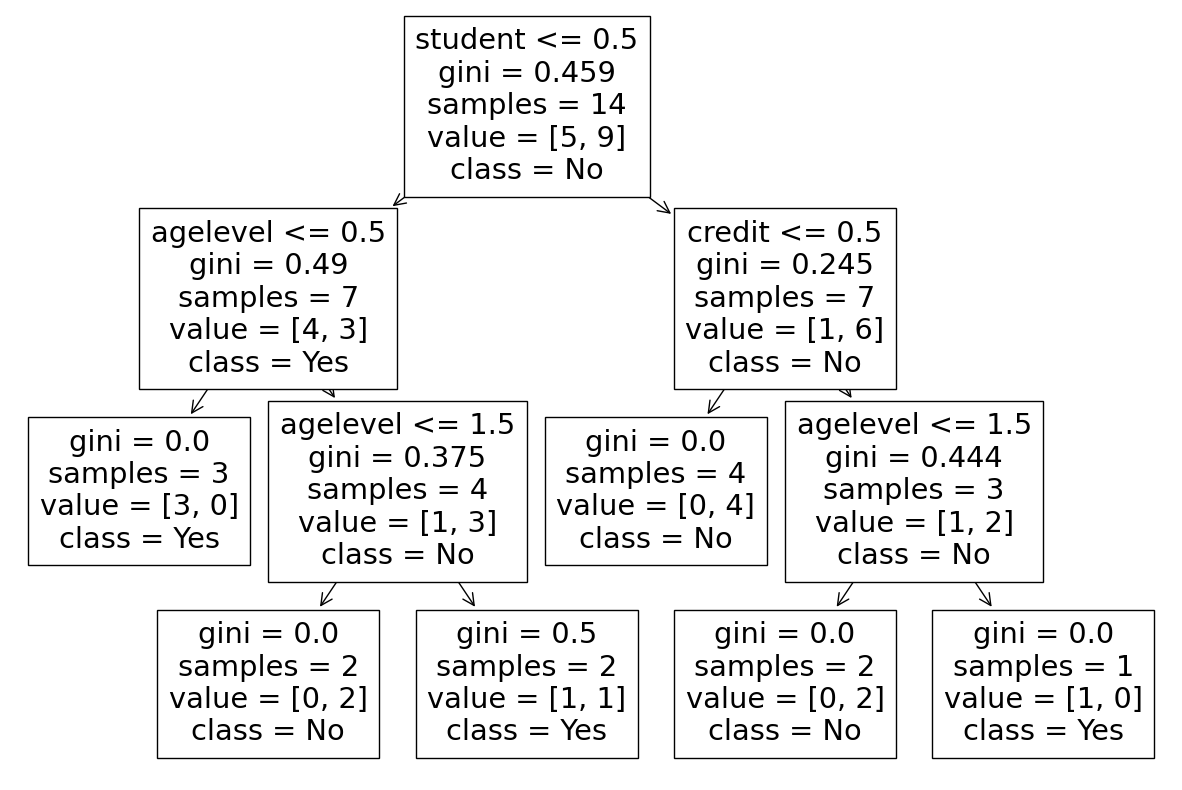

In [73]:
# from sklearn.tree import export_graphviz
#產出 tree dot 檔
# decisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
# decisionTree.fit(buycomputer_data, buycomputer_target)

feature_names = ['agelevel', 'income', 'student', 'credit']
A = ['Yes', 'No']

#直接劃出樹狀圖
plt.figure(figsize=(15,10))
plot_tree(decisionTree, feature_names=feature_names, class_names=A)
plt.show()

#產生dot檔
export_graphviz(decisionTree, 
                out_file='buyComputer_tree.dot', 
                feature_names=feature_names, class_names=A)

### 以下方式可以透過程式碼直接輸出圖片
##　打開終端機，先安裝相關套件
```shell 
    pip install graphviz
    pip install pydotplus
```

In [68]:
# # 透過pydotplus, 將 dot 檔直接輸出檔案，檔名為tree.png
# #import pydotplus

graph_a = pydotplus.graph_from_dot_file('buyComputer_tree.dot')
graph_a.write_png('buyComputer_tree.png') # generate graph in svg.

True

## 額外補充
```
## 將 dot 檔轉成可以圖形，需要安裝軟體
http://www.graphviz.org

Mac install graphviz 方法
透過 homebrew 安裝

* Step 1：打開終端機

* Step 2：沒安裝遇homebrew的，請先安裝 homebrew ，網址：https://brew.sh/。
安裝語法：/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"

* Step 3：安裝 graphviz
安裝語法：brew install graphviz

* Step 4：to create png, and visualize it by clicking on the png file! 
use: dot  -Tpng tree.dot  -o  tree.png
```